<a href="https://colab.research.google.com/github/EmperorNao/MLHub/blob/main/examples/ipynb/ClusteringForTMV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!wget -O iris.data https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2022-02-26 19:04:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-02-26 19:04:40 (155 MB/s) - ‘iris.data’ saved [4551/4551]



In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def euclidian_distance(x_1, x_2):

    return np.sum(np.square(x_1 - x_2), axis=-1) ** 0.5


In [30]:
import pandas as pd
import numpy as np


def scale(x: np.ndarray) -> np.ndarray:

    z = ((x - x.mean()) / x.std())
    return z



def iris():

    columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
    train_col = ["sepal length", "sepal width", "petal length", "petal width"]
    test_col = "class"

    df = pd.read_csv(r"iris.data", names=columns)

    df[train_col] = scale(df[train_col])

    df.loc[df[test_col] == "Iris-setosa", test_col] = 0
    df.loc[df[test_col] == "Iris-versicolor", test_col] = 1
    df.loc[df[test_col] == "Iris-virginica", test_col] = 2

    return df[train_col].to_numpy(dtype=np.float32), df[test_col].to_numpy(dtype=np.float32)

def get_dataset(name):

    if name == "iris":

        return iris()

    return [], []

In [16]:
def euclidian_distance(x_1, x_2):

    return np.sum(np.square(x_1 - x_2), axis=-1) ** 0.5

In [42]:

class KMeans:

    def __init__(self, k, max_iter=1000, n_starts=10, dist=euclidian_distance):

        self.k = k
        self.max_iiter = max_iter
        self.n_starts = n_starts
        self.dist = dist

    def _centers(self, x, k):

        n_dims = x.shape[1]

        std = x.std(axis=0)
        max = x.max(axis=0)
        min = x.min(axis=0)
        diff = (max - min) / k

        return np.array([min + diff * np.random.randint(0, k) + np.random.normal(scale=std, size=(n_dims)) for i in range(k)])

    def fit_and_predict(self, x):

        m = x.shape[0]

        iter = 0
        centers = self._centers(x, self.k)
        labels = np.zeros((m))
        while True and iter < self.max_iiter:

            dist = []
            for cls in range(0, self.k):
                t = np.tile(centers[cls], (m, 1))
                d = self.dist(x, t)
                dist.append(d)

            dist = np.vstack(dist).T
            new_labels = np.argmin(dist, axis=1)
            iter += 1
            if not np.sum(new_labels == labels):
                break

            labels = new_labels

            for cls in range(0, self.k):
                cls_x = x[labels == cls]
                centers[cls] = 0 if not cls_x.shape[0] else np.sum(cls_x, axis=0) / cls_x.shape[0]

        return labels


In [43]:
def get_clustering_res(models: dict, x):

    out = [model.fit_and_predict(x) for model in models.values()]

    return out

In [44]:
def get_color(l):

    if l == 0:
        return "red"
    elif l == 1:
        return "blue"
    elif l == 2:
        return "yellow"
    elif l == 3:
        return "green"


def plot_clustering(x, y, title):

    fig = plt.figure(figsize=(x.shape[1] * 5, x.shape[1] * 5))

    plt.title(title)
    for i in range(x.shape[1]):
        for j in range(x.shape[1]):

            plt.subplot(x.shape[1], x.shape[1], 1 + i * x.shape[1] + j)
            plt.scatter(x[:, i], x[:, j], c = [get_color(lab) for lab in y])
    plt.show()

In [45]:
def plot_clustering(x, y, title):

    fig = plt.figure(figsize=(x.shape[1] * 3, x.shape[1] * 3))

    plt.title(title)
    for i in range(x.shape[1]):
        for j in range(x.shape[1]):

            plt.subplot(x.shape[1], x.shape[1], 1 + i * x.shape[1] + j)
            plt.scatter(x[:, i], x[:, j], c = [get_color(lab) for lab in y])
    plt.show()


def clustering_test():

    np.random.seed(42)
    cluster = KMeans(k=3)

    x, y = get_dataset("iris")

    outp = get_clustering_res({"kmeans": cluster}, x)

    print("Scatter plot'ы оригинальных классов по парам факторов")
    plot_clustering(x, y, "original")

    print("\n" * 10)

    print("Scatter plot'ы кластеризации с помощью KMeans")
    plot_clustering(x, outp[0], "clustering")

# Важно

Для кластеризации KMeans очень важны выборы центров кластеров

Я пока не успел подготовить имплементацию мультистарта, потому что возникают вопросы, как сгруппировать одинаковые кластеры, размеченные разными метками, однако идеи есть

Сейчас же, пока можем смотреть глазами, я стараюсь зафиксировать удачный сид при котором кластеры выделены нормально

Видно, что более менее качествено происходит кластеризация

Из-за того, что непонятно, как правильно разметить кластеры, трудно проверить метриками, только смотреть глазами

Scatter plot'ы оригинальных классов по парам факторов


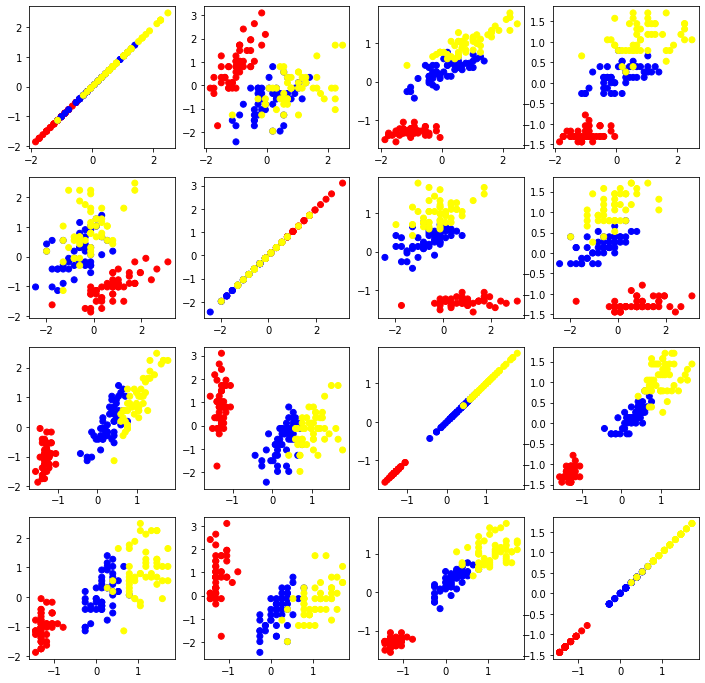












Scatter plot'ы кластеризации с помощью KMeans


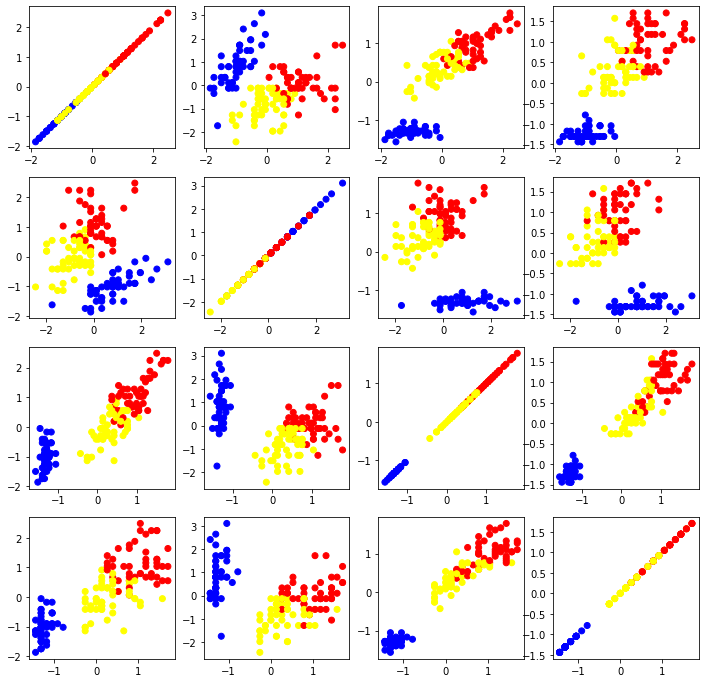

In [46]:
clustering_test()